In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

In [20]:
class gradient_descent_Logit_R():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]
    
    # cross entropy loss of one data
    def cross_entropy_loss(self, y, y_hat):
        return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

    # total cross entropy loss
    def loss(self):
        total_loss = sum(self.cross_entropy_loss(self.y[i], self.sigmoid(x@self.weights)) for i, x in enumerate(self.X))
        return total_loss

    # sigmoid function
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))

    # gradient of loss
    def gradient_L(self):
        sigmoids = np.array([self.sigmoid(x@self.weights) - self.y[i] for i, x in enumerate(self.X)])
        d_w = sigmoids @ self.X
        return d_w

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)
        for i in range(1, max_iter+1):
            dw = self.gradient_L()
            weights = weights - gamma * dw
            self.weights = weights
            self.weights_history.append(weights)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter or abs(L - self.loss_history[i-1]) <= self.eta:
                break
    
    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        labels = np.array([1, 0])
        y_hat = [self.sigmoid(x @ weights) for x in X]
        return [np.random.choice(labels, p = [y_hat_i, 1.0-y_hat_i]) for y_hat_i in y_hat]

In [36]:
X, y = load_iris(return_X_y=True, as_frame=True)
X = X[y!=2]
y = y[y!=2]

In [37]:

X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=24)
model = gradient_descent_Logit_R()
model.fit(X_train, y_train,gamma=0.01, max_iter=1000)

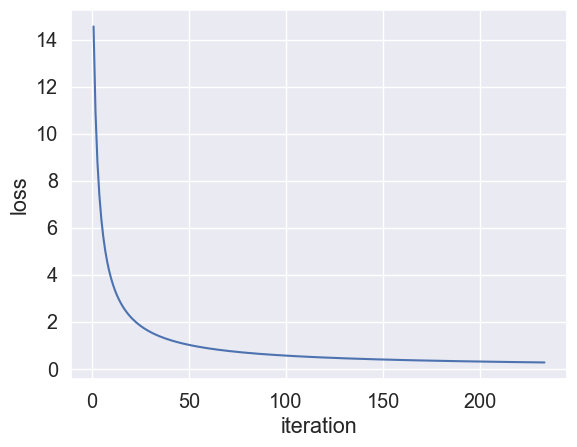

In [44]:
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [45]:
y_pred = model.prediction(X_test, model.weights)
print(f'Logistic regression, accuracy score = {accuracy_score(y_test, y_pred)}')

Logistic regression, accuracy score = 1.0


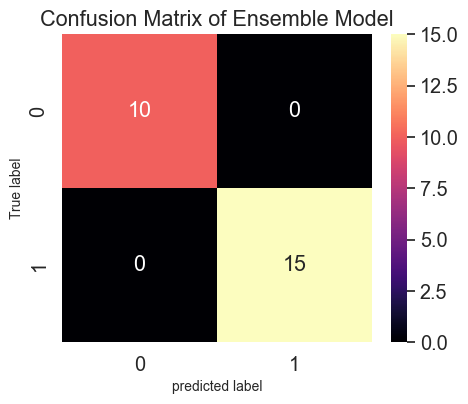

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()